# Unbalanced df

In [21]:
import pandas as pd
df = pd.read_csv('../../Datos/unbalanced_df.csv').drop(['time'],axis=1)
df_features = df
df_features.head()

,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),...,anio,trimestre,dia_del_mes,dia_del_anio,es_fin_de_semana,es_festivo_mexico,dia_partido,es_dia_laborable,estacion,count
0,3,25.6,15.8,20.3,26.5,16.0,20.9,0.0,0.0,0.0,...,2017,1,1,1,1,1,0,0,4,46
1,0,27.4,12.4,19.9,26.8,10.8,19.2,0.0,0.0,0.0,...,2017,1,2,2,0,0,0,1,4,52
2,1,25.7,16.0,20.5,26.2,14.7,20.2,0.0,0.0,0.0,...,2017,1,3,3,0,0,0,1,4,76
3,51,19.2,13.4,16.7,19.8,13.4,16.9,1.2,1.2,0.0,...,2017,1,4,4,0,0,0,1,4,73
4,2,24.6,12.5,17.9,25.2,11.7,18.1,0.0,0.0,0.0,...,2017,1,5,5,0,0,0,1,4,65


In [22]:
# Preparar la matriz de características (X) y el vector objetivo (Y)
# En X, eliminamos las columnas 'time' y 'count' que no son características
X = df_features.drop(['count'], axis=1)

# En Y, seleccionamos la columna 'count' como nuestro vector objetivo
Y = df_features['count']


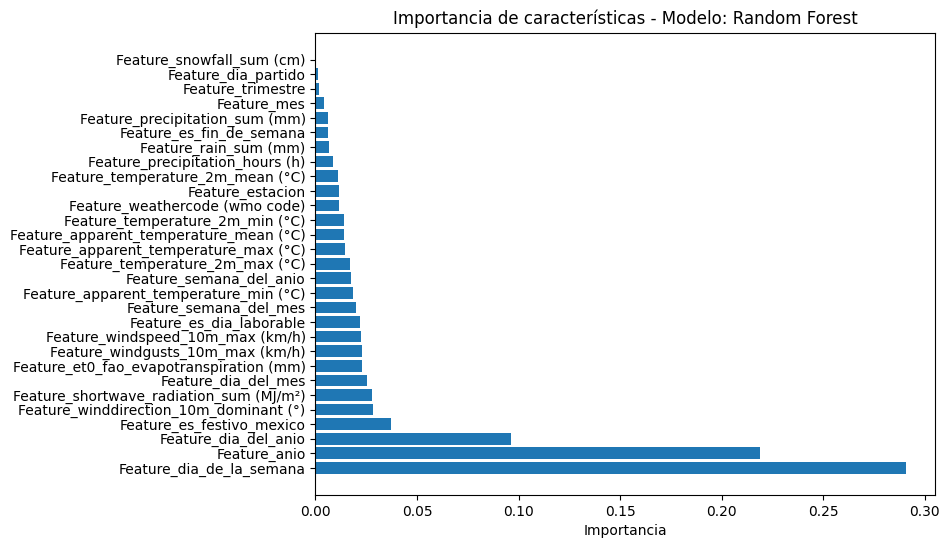

No se pudo obtener la importancia de características para el modelo: SVR



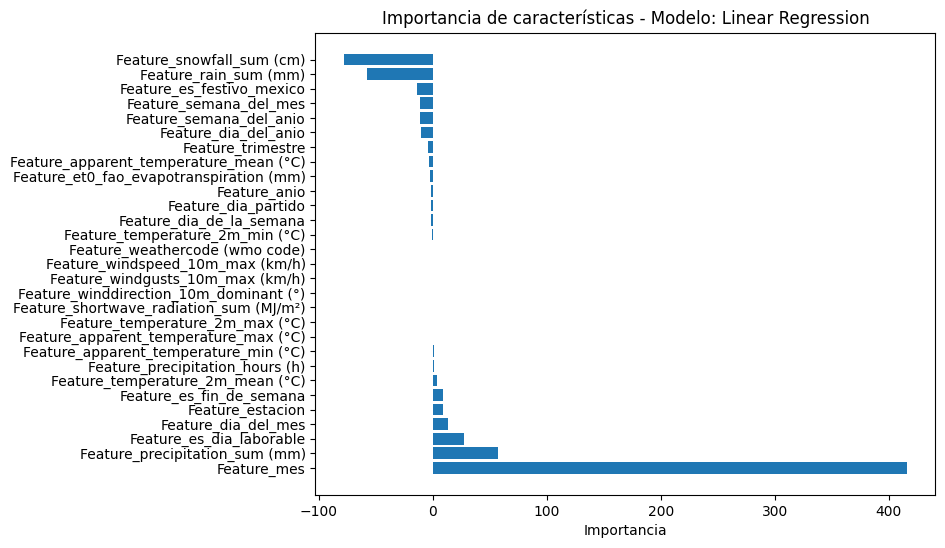

No se pudo obtener la importancia de características para el modelo: K-NN



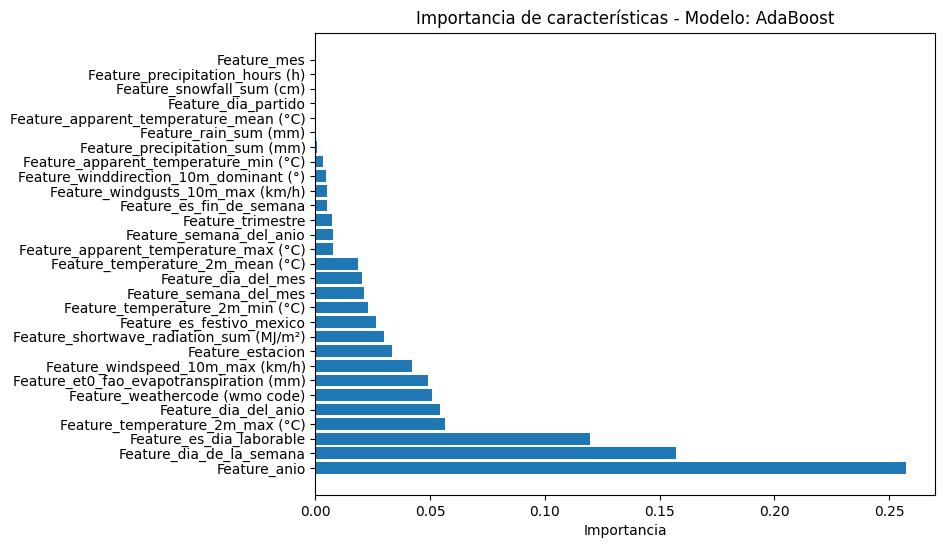

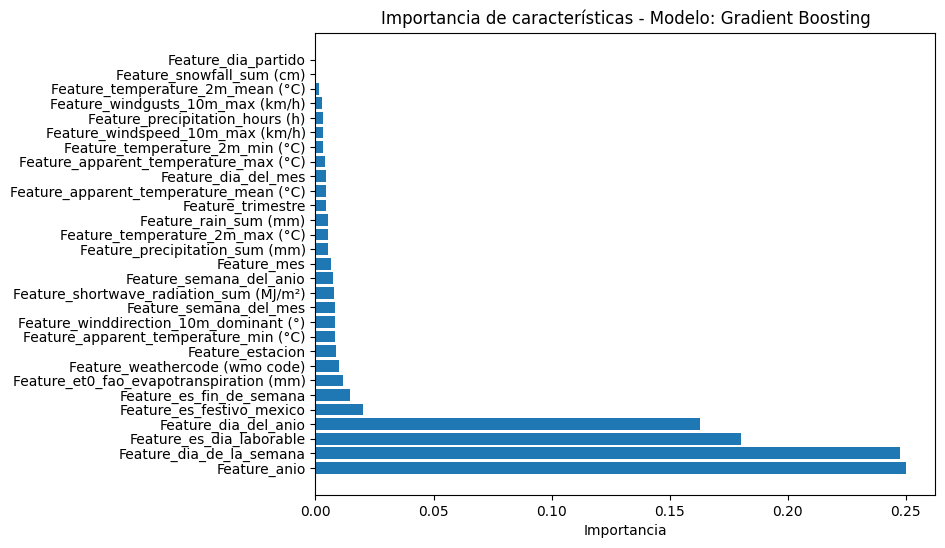

No se pudo obtener la importancia de características para el modelo: Neural Network (ANN)



In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Generar datos de ejemplo (puedes reemplazar esto con tu propio conjunto de datos)
column_names = [f"Feature_{X.iloc[:, i].name}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=column_names)

# Entrenar cada modelo y obtener la importancia de las características
models = {
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Linear Regression': LinearRegression(),
    'K-NN': KNeighborsRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Neural Network (ANN)': MLPRegressor()
}

for name, model in models.items():
    model.fit(X, Y)
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
    elif hasattr(model, 'coef_'):
        feature_importance = model.coef_
    else:
        feature_importance = None

    if feature_importance is not None:
        importance_df = pd.DataFrame({'Feature': column_names, 'Importance': feature_importance})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        #print(f"Modelo: {name}")
        #print(importance_df)
        #print("\n")

        # Reemplazar los nombres genéricos con los nombres originales de las columnas
        importance_df['Feature'] = df.columns[importance_df.index]

        # Gráfico de barras para la importancia de las características
        plt.figure(figsize=(8, 6))
        plt.barh(importance_df['Feature'], importance_df['Importance'])
        plt.xlabel('Importancia')
        plt.title(f'Importancia de características - Modelo: {name}')
        plt.show()
    else:
        print(f"No se pudo obtener la importancia de características para el modelo: {name}\n")


In [25]:
# Preparar la matriz de características (X) y el vector objetivo (Y)
# En X, eliminamos las columnas 'time' y 'count' que no son características
X = df_features[['anio','dia_de_la_semana','es_dia_laborable','dia_del_anio']]

# En Y, seleccionamos la columna 'count' como nuestro vector objetivo
Y = df_features['count']



In [ ]:
# Preparar la matriz de características (X) y el vector objetivo (Y)
# En X, eliminamos las columnas 'time' y 'count' que no son características
X = df_features[['winddirection_10m_dominant (°)','semana_del_mes','semana_del_anio','es_festivo_mexico','anio','dia_de_la_semana']]

# En Y, seleccionamos la columna 'count' como nuestro vector objetivo
Y = df_features['count']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np
import time
import pandas as pd

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore') 

# Inicializa diferentes modelos de regresión
models = {
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Linear Regression': LinearRegression(),
    'K-NN': KNeighborsRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Neural Network (ANN)': MLPRegressor()
}

# Define diferentes tamaños de conjunto de prueba para probar
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]

# Número de iteraciones por tamaño de prueba
num_iterations = 200
# Almacena los resultados de todas las iteraciones en un solo DataFrame
all_results = []

for test_size in test_sizes:

    # Divide los datos en entrenamiento y prueba con el nuevo tamaño de prueba fuera del bucle de modelos
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)

    for iteration in range(num_iterations):
        results = {}
        for model_name, model in models.items():
            start_time = time.time()

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            end_time = time.time()
            elapsed_time = end_time - start_time

            mae = mean_absolute_error(y_test, y_pred)
            mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
            mse = mean_squared_error(y_test, y_pred)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            msle = mean_squared_log_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            results[model_name] = {
                'MAE': mae,
                'MAPE': mape,
                'MSE': mse,
                'RMSE': rmse,
                'MSLE': msle,
                'R-squared': r2,
                'Elapsed Time (s)': elapsed_time
            }

        all_results.append(results)

    

# Crear un DataFrame único con los resultados acumulados
results_df = pd.concat([pd.DataFrame.from_dict(iteration_results, orient='index') for iteration_results in all_results], keys=test_sizes, names=['Test Size','Modelo'])
#results_df.columns = ['Test Size', 'Modelo', 'MAE','MAPE','RMSE','R-squared','Elapsed Time (s)']

# Mostrar el DataFrame completo
results_df.sort_values(by=('R-squared'), ascending=False).head(20)


MAE       MAPE         MSE       RMSE   
Test Size Modelo                                                           
0.3       Gradient Boosting   9.945099  14.366296  165.612283  12.869044  \
0.1       Gradient Boosting   9.945099  14.366296  165.612283  12.869044   
0.4       Gradient Boosting   9.945099  14.366296  165.612283  12.869044   
0.2       Gradient Boosting   9.945099  14.366296  165.612283  12.869044   
0.5       Gradient Boosting   9.945099  14.366296  165.612283  12.869044   
          Random Forest      10.164583  14.787829  173.110595  13.157150   
0.1       Random Forest      10.315046  15.040412  177.299891  13.315401   
0.4       Random Forest      10.317361  15.006804  178.410033  13.357022   
0.2       Random Forest      10.455046  15.157654  183.008872  13.528077   
0.3       Random Forest      10.514769  15.276366  184.109005  13.568677   
          AdaBoost           11.708223  17.596630  226.284435  15.042754   
0.4       AdaBoost           11.807993  17.421936  230.270307  15.174660   
0.2       AdaBoost           12.129707  17.845282  238.071711  15.429573   
0.1       AdaBoost           12.170729  18.111806  238.738093  15.451152   
0.5       AdaBoost           12.456903  18.842903  251.140304  15.847407   
          Linear Regression  16.038716  24.598714  372.523673  19.300872   
0.2       Linear Regression  16.038716  24.598714  372.523673  19.300872   
0.1       Linear Regression  16.038716  24.598714  372.523673  19.300872   
0.3       Linear Regression  16.038716  24.598714  372.523673  19.300872   
0.4       Linear Regression  16.038716  24.598714  372.523673  19.300872   

                                 MSLE  R-squared  Elapsed Time (s)  
Test Size Modelo                                                    
0.3       Gradient Boosting  0.034074   0.683175          0.115247  
0.1       Gradient Boosting  0.034074   0.683175          0.123618  
0.4       Gradient Boosting  0.034074   0.683175          0.116481  
0.2       Gradient Boosting  0.034074   0.683175          0.116735  
0.5       Gradient Boosting  0.034074   0.683175          0.163236  
          Random Forest      0.035217   0.668830          1.045154  
0.1       Random Forest      0.035984   0.660816          0.644359  
0.4       Random Forest      0.036103   0.658692          0.623087  
0.2       Random Forest      0.036943   0.649894          0.700124  
0.3       Random Forest      0.037249   0.647790          0.649018  
          AdaBoost           0.045760   0.567106          0.051369  
0.4       AdaBoost           0.045912   0.559481          0.033805  
0.2       AdaBoost           0.047444   0.544556          0.032914  
0.1       AdaBoost           0.047945   0.543281          0.054084  
0.5       AdaBoost           0.051319   0.519555          0.082470  
          Linear Regression  0.077851   0.287342          0.000000  
0.2       Linear Regression  0.077851   0.287342          0.000000  
0.1       Linear Regression  0.077851   0.287342          0.000000  
0.3       Linear Regression  0.077851   0.287342          0.000000  
0.4       Linear Regression  0.077851   0.287342          0.000000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


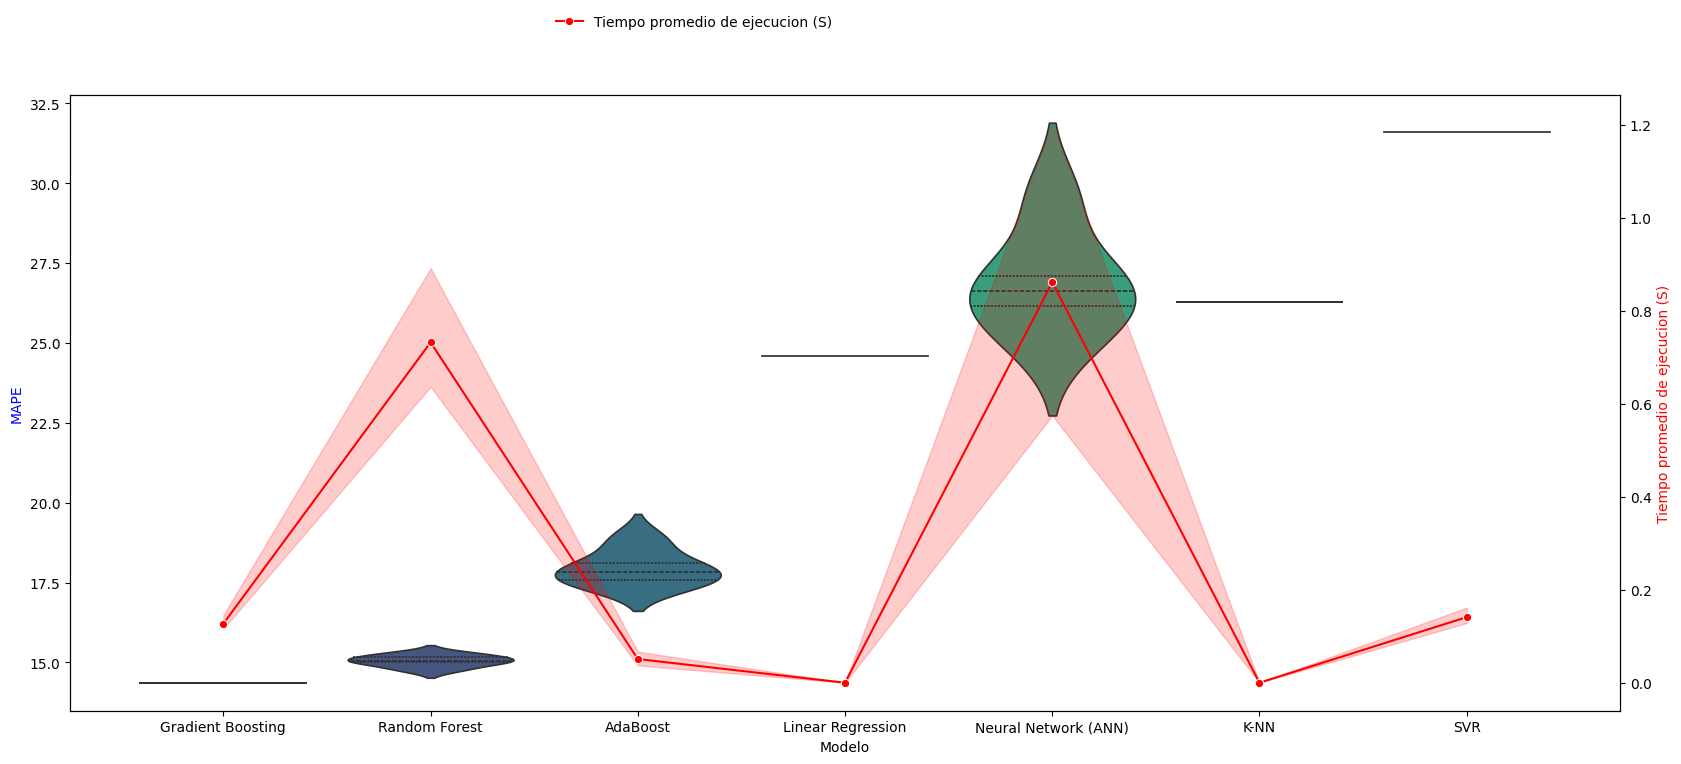

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra los 20 mejores resultados según el valor de R-squared
top_results = results_df.sort_values(by='R-squared', ascending=False)#.head(20)

# Reorganiza el DataFrame para facilitar la visualización
df_plot = top_results.reset_index()

# Crea el violin plot
fig, ax1 = plt.subplots(figsize=(20, 8))
sns.violinplot(x='Modelo', y='MAPE', data=df_plot, inner='quartile', ax=ax1, palette='viridis')

# Ajusta el límite del eje y para MAPE
#ax1.set_ylim(20, 30)

# Añade un segundo eje y para el tiempo de ejecución
ax2 = ax1.twinx()
sns.lineplot(x='Modelo', y='Elapsed Time (s)', data=df_plot, ax=ax2, color='red', marker='o', label='Tiempo promedio de ejecucion (S)')

# Ajusta las leyendas y etiquetas
ax1.set_ylabel('MAPE', color='blue')
ax2.set_ylabel('Tiempo promedio de ejecucion (S)', color='red')

# Posiciona la leyenda en la parte superior
ax1.legend(loc='upper left', bbox_to_anchor=(0.5, 1.15), frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(0.5, 1.15), frameon=False)

plt.show()


# Df Balanceado

In [10]:
# Separar el DataFrame en las dos categorías: días laborables (1) y no laborables (0)
df_laborable = df_features[df_features['es_dia_laborable'] == 1]
df_no_laborable = df_features[df_features['es_dia_laborable'] == 0]

# Seleccionar aleatoriamente la mitad de las entradas de 'es_dia_laborable' de la categoría 1
# para asegurar que tengamos la misma cantidad de registros para ambas categorías
tamaño_muestra = min(len(df_laborable), len(df_no_laborable))
df_laborable_muestreado = df_laborable.sample(n=tamaño_muestra)

# Combinar las entradas muestreadas de 'es_dia_laborable' de la categoría 1
# con todas las entradas de 'es_dia_laborable' de la categoría 0
balanced_df = pd.concat([df_laborable_muestreado, df_no_laborable])

# Barajar las filas en el DataFrame balanceado para evitar sesgos en el orden de los datos
balanced_df = balanced_df.sample(frac=1)

# Ahora, 'balanced_df' contiene un conjunto de datos balanceado con un número igual de días para cada categoría


In [33]:
import pandas as pd
df = pd.read_csv('../../Datos/df_balanceado.csv').drop(['time'],axis=1)
balanced_df = df
balanced_df.head()

,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),...,weathercode_1,weathercode_2,weathercode_3,weathercode_51,weathercode_53,weathercode_55,weathercode_61,weathercode_63,weathercode_65,weathercode_71
0,20.6,15.6,17.2,23.1,16.1,18.0,12.4,12.4,0.0,17,...,0,0,0,0,0,0,1,0,0,0
1,30.1,22.5,25.9,32.5,25.9,28.5,0.2,0.2,0.0,2,...,0,0,0,1,0,0,0,0,0,0
2,32.8,22.6,27.2,34.1,26.5,29.8,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,0,0
3,25.4,14.3,19.5,27.3,13.5,20.3,0.0,0.0,0.0,0,...,1,0,0,0,0,0,0,0,0,0
4,27.0,21.8,23.5,29.0,24.9,26.7,18.2,18.2,0.0,19,...,0,0,0,0,0,0,0,1,0,0


In [34]:
# Preparar la matriz de características (X) y el vector objetivo (Y)
# En X, eliminamos las columnas 'time' y 'count' que no son características
X = balanced_df.drop(['count'], axis=1)

# En Y, seleccionamos la columna 'count' como nuestro vector objetivo
Y = balanced_df['count']


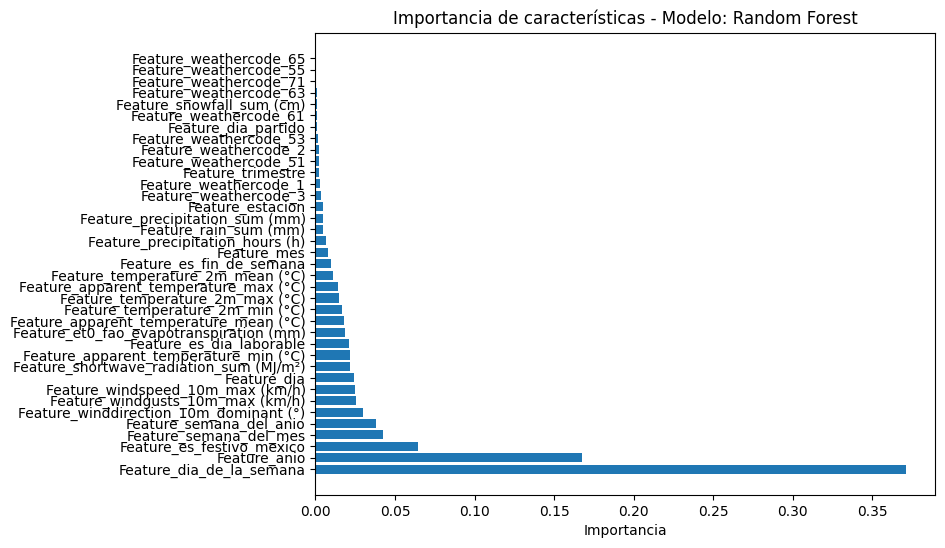

No se pudo obtener la importancia de características para el modelo: SVR



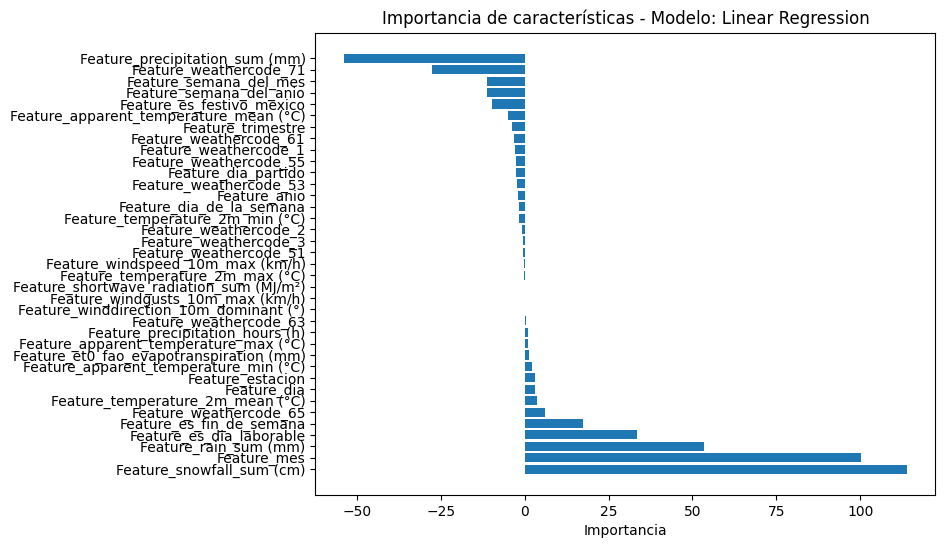

No se pudo obtener la importancia de características para el modelo: K-NN



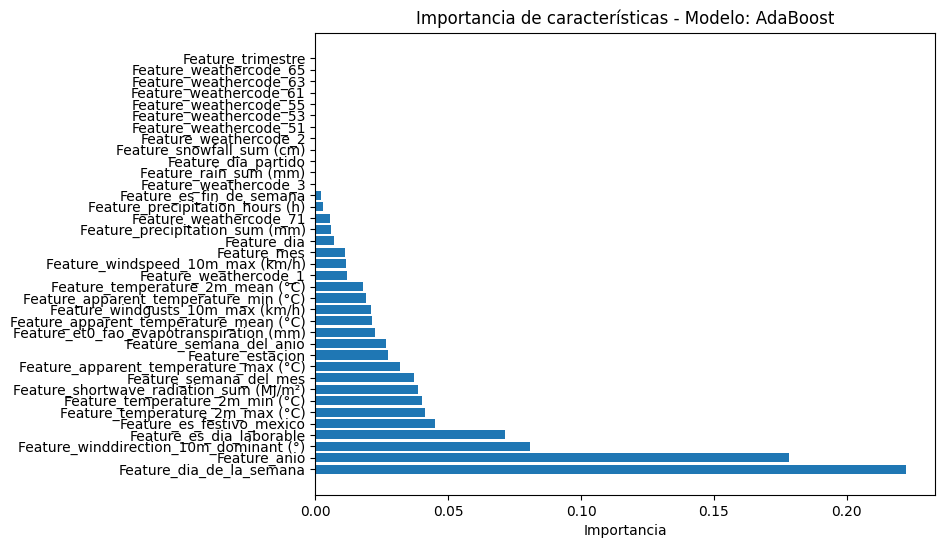

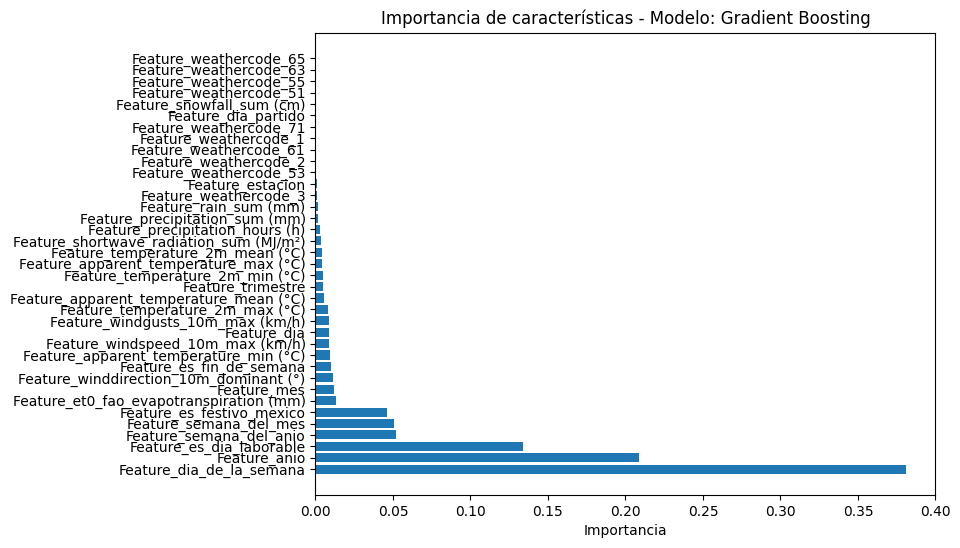

No se pudo obtener la importancia de características para el modelo: Neural Network (ANN)



In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Generar datos de ejemplo (puedes reemplazar esto con tu propio conjunto de datos)
column_names = [f"Feature_{X.iloc[:, i].name}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=column_names)

# Entrenar cada modelo y obtener la importancia de las características
models = {
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Linear Regression': LinearRegression(),
    'K-NN': KNeighborsRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Neural Network (ANN)': MLPRegressor()
}

for name, model in models.items():
    model.fit(X, Y)
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
    elif hasattr(model, 'coef_'):
        feature_importance = model.coef_
    else:
        feature_importance = None

    if feature_importance is not None:
        importance_df = pd.DataFrame({'Feature': column_names, 'Importance': feature_importance})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        #print(f"Modelo: {name}")
        #print(importance_df)
        #print("\n")

        # Reemplazar los nombres genéricos con los nombres originales de las columnas
        importance_df['Feature'] = df.columns[importance_df.index]

        # Gráfico de barras para la importancia de las características
        plt.figure(figsize=(8, 6))
        plt.barh(importance_df['Feature'], importance_df['Importance'])
        plt.xlabel('Importancia')
        plt.title(f'Importancia de características - Modelo: {name}')
        plt.show()
    else:
        print(f"No se pudo obtener la importancia de características para el modelo: {name}\n")


In [38]:
# Preparar la matriz de características (X) y el vector objetivo (Y)
# En X, eliminamos las columnas 'time' y 'count' que no son características
X = balanced_df[['dia_de_la_semana', 'anio', 'es_dia_laborable','semana_del_anio','semana_del_mes','es_festivo_mexico']]

# En Y, seleccionamos la columna 'count' como nuestro vector objetivo
Y = balanced_df['count']



In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np
import time
import pandas as pd

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore') 

# Divide tus datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Inicializa diferentes modelos de regresión
models = {
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Linear Regression': LinearRegression(),
    'K-NN': KNeighborsRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Neural Network (ANN)': MLPRegressor()
}

# Define diferentes tamaños de conjunto de prueba para probar
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]

# Número de iteraciones por tamaño de prueba
num_iterations = 200
# Almacena los resultados de todas las iteraciones en un solo DataFrame
all_results = []

for test_size in test_sizes:

    # Divide los datos en entrenamiento y prueba con el nuevo tamaño de prueba fuera del bucle de modelos
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)

    for iteration in range(num_iterations):
        results = {}
        for model_name, model in models.items():
            start_time = time.time()

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            end_time = time.time()
            elapsed_time = end_time - start_time

            mae = mean_absolute_error(y_test, y_pred)
            mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
            mse = mean_squared_error(y_test, y_pred)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            msle = mean_squared_log_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            results[model_name] = {
                'MAE': mae,
                'MAPE': mape,
                'MSE': mse,
                'RMSE': rmse,
                'MSLE': msle,
                'R-squared': r2,
                'Elapsed Time (s)': elapsed_time
            }

        all_results.append(results)

    

# Crear un DataFrame único con los resultados acumulados
results_df = pd.concat([pd.DataFrame.from_dict(iteration_results, orient='index') for iteration_results in all_results], keys=test_sizes, names=['Test Size','Modelo'])
#results_df.columns = ['Test Size', 'Modelo', 'MAE','MAPE','RMSE','R-squared','Elapsed Time (s)']

# Mostrar el DataFrame completo
results_df.sort_values(by=('R-squared'), ascending=False).head(20)


MAE       MAPE         MSE       RMSE   
Test Size Modelo                                                           
0.5       Gradient Boosting  10.596786  17.003081  184.983836  13.600876  \
0.3       Gradient Boosting  10.596786  17.003081  184.983836  13.600876   
0.2       Gradient Boosting  10.596786  17.003081  184.983836  13.600876   
0.1       Gradient Boosting  10.596786  17.003081  184.983836  13.600876   
0.4       Gradient Boosting  10.596786  17.003081  184.983836  13.600876   
          Random Forest      10.562214  16.623130  194.714727  13.954022   
0.2       Random Forest      10.547328  16.558177  195.258534  13.973494   
0.1       Random Forest      10.546260  16.545237  196.356168  14.012715   
0.5       Random Forest      10.562061  16.671198  196.873198  14.031151   
0.3       Random Forest      10.633664  16.648882  197.162131  14.041443   
0.1       AdaBoost           12.146425  19.854455  226.466283  15.048797   
0.5       AdaBoost           12.355901  20.439399  238.111911  15.430875   
0.3       AdaBoost           12.602713  20.847398  241.439033  15.538309   
0.2       AdaBoost           12.515019  20.317912  244.253101  15.628599   
0.4       AdaBoost           12.969861  21.470825  268.247477  16.378262   
0.5       K-NN               15.093130  24.300025  348.917863  18.679343   
0.4       K-NN               15.093130  24.300025  348.917863  18.679343   
0.3       K-NN               15.093130  24.300025  348.917863  18.679343   
0.2       K-NN               15.093130  24.300025  348.917863  18.679343   
0.1       K-NN               15.093130  24.300025  348.917863  18.679343   

                                 MSLE  R-squared  Elapsed Time (s)  
Test Size Modelo                                                    
0.5       Gradient Boosting  0.042404   0.659026          0.080085  
0.3       Gradient Boosting  0.042404   0.659026          0.088015  
0.2       Gradient Boosting  0.042404   0.659026          0.084023  
0.1       Gradient Boosting  0.042404   0.659026          0.094718  
0.4       Gradient Boosting  0.042404   0.659026          0.079784  
          Random Forest      0.042159   0.641089          0.512675  
0.2       Random Forest      0.042155   0.640087          0.495318  
0.1       Random Forest      0.042053   0.638064          0.562360  
0.5       Random Forest      0.042920   0.637111          0.492799  
0.3       Random Forest      0.042476   0.636578          0.545308  
0.1       AdaBoost           0.053285   0.582563          0.052940  
0.5       AdaBoost           0.056551   0.561097          0.057505  
0.3       AdaBoost           0.057270   0.554964          0.051196  
0.2       AdaBoost           0.056103   0.549777          0.045533  
0.4       AdaBoost           0.061786   0.505549          0.036757  
0.5       K-NN               0.080007   0.356852          0.000000  
0.4       K-NN               0.080007   0.356852          0.004140  
0.3       K-NN               0.080007   0.356852          0.003088  
0.2       K-NN               0.080007   0.356852          0.006509  
0.1       K-NN               0.080007   0.356852          0.000000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


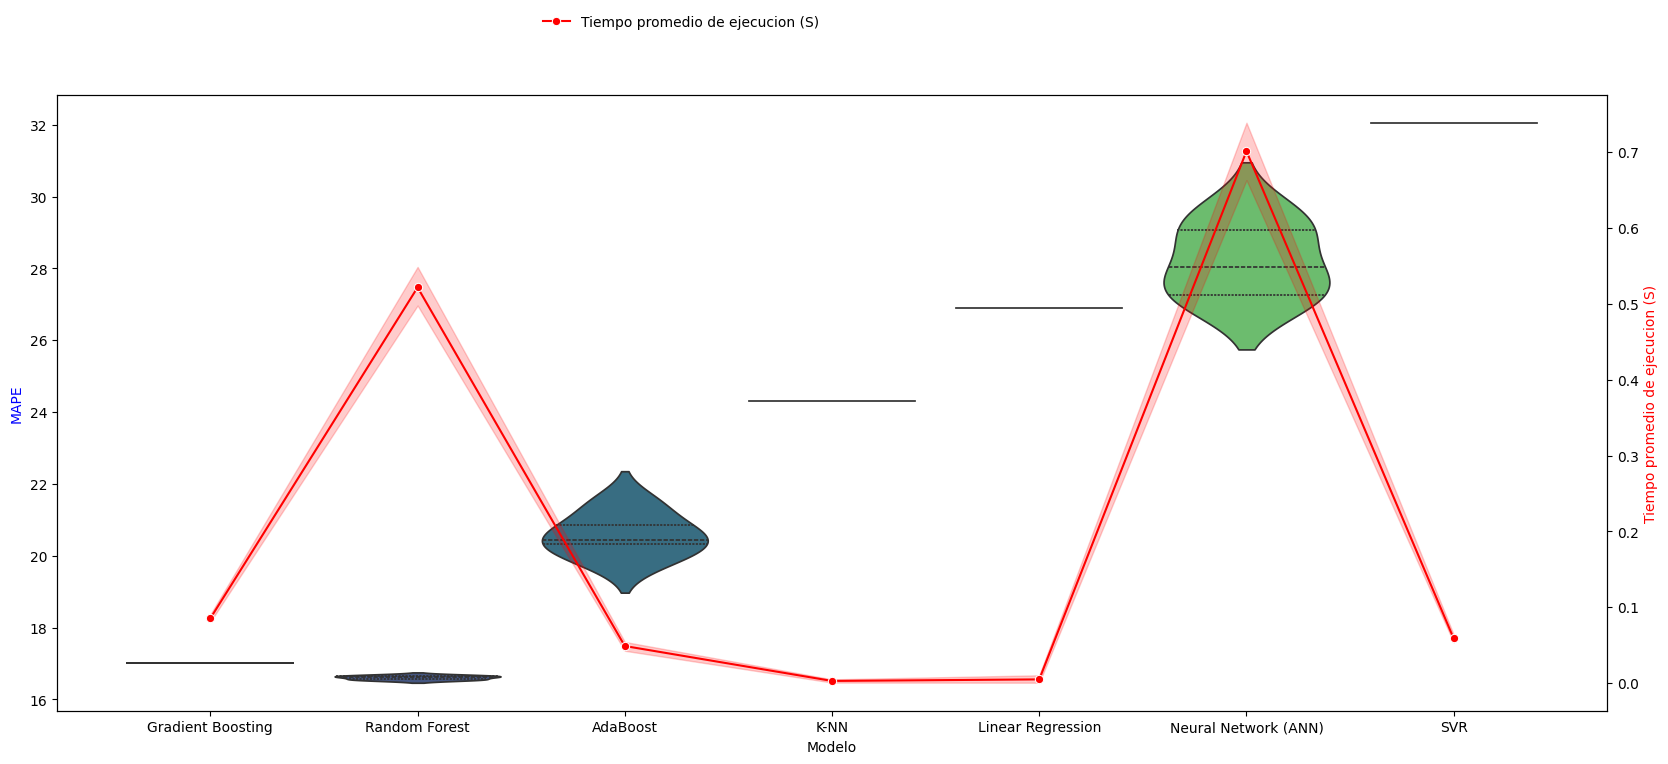

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra los 20 mejores resultados según el valor de R-squared
top_results = results_df.sort_values(by='R-squared', ascending=False)#.head(20)

# Reorganiza el DataFrame para facilitar la visualización
df_plot = top_results.reset_index()

# Crea el violin plot
fig, ax1 = plt.subplots(figsize=(20, 8))
sns.violinplot(x='Modelo', y='MAPE', data=df_plot, inner='quartile', ax=ax1, palette='viridis')

# Ajusta el límite del eje y para MAPE
#ax1.set_ylim(20, 30)

# Añade un segundo eje y para el tiempo de ejecución
ax2 = ax1.twinx()
sns.lineplot(x='Modelo', y='Elapsed Time (s)', data=df_plot, ax=ax2, color='red', marker='o', label='Tiempo promedio de ejecucion (S)')

# Ajusta las leyendas y etiquetas
ax1.set_ylabel('MAPE', color='blue')
ax2.set_ylabel('Tiempo promedio de ejecucion (S)', color='red')

# Posiciona la leyenda en la parte superior
ax1.legend(loc='upper left', bbox_to_anchor=(0.5, 1.15), frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(0.5, 1.15), frameon=False)

plt.show()
